# Examples to the Medium article "Monte Carlo Methods in Reinforcement Learning"

In this notebook I want to give a practical example of an application of the described methods in the medium [article]().

This notebook covers code expamples for:
- On-policy MC prediction
- On-policy MC with exploring starts
- On-policy MC control without exploring starts
- Off-policy MC prediction
- Off-policy MC control

All Algorithms are applied to the Gridworld toy example which will be explained below.

## Gridworld Environment

The reinforcement learning problem where the named algorithms are applied to is Gridworld. Gridworld is and environment where the agent spawns in a starting position and needs to find a goal state on a discrete stationary grid. The agent has four different actions he can perform, these are: [Up (0), Right (1), Left (2), Down (3)]. The following image shows the environment:

![environment](images/gridworld.png)

Every field in the environment has its state number in the upper left corner. Starting position is state 8 in the bottom left hand corner. For each step the agent can move one field in one direction. If the agent is at the edge of the environment, for example state 4 and takes action 2 (move left) he bounces back to its original position, that is state 4. Field nr 5 are rocks and can not be entered. the agent moves back to its position. The goal state is state 3 where the agent receives a reward of +1 below state 3 is state 7. If the agent enters state 7 he receives a negative reward of -1. For each step the agent takes he receives a reward of -0.1. One episode ends if the agent reaches the goal state or after 30 interactions. 

# On-policy MC

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = "serif"
import copy
from gridworld import *

## On-policy MC prediction
As in the article explained, all algorithms are implemented based on a first-visit method. 

In [12]:
# init the environment:
max_episodes = 3000
env = Gridworld(step_cost=-0.1,max_ep_length=30)
Returns = {"0":[], "1":[], "2":[], "3":[],
           "4":[], "5":[], "6":[], "7":[],
           "8":[], "9":[], "10":[], "11":[]}
state_value_grid = np.zeros(12) # state vale grid
state_value_grid[3] = 1 # Goal
state_value_grid[7] = -1 # Death
g = 0.99 # discounting factor

![mc prediction onpolicy](images/pseudo_mc_pred.png)

In [27]:
for ep in range(max_episodes):
    G = 0
    state = env.reset()
    trajectory = []
    while True:        
        action = np.random.randint(4) #random policy
        next_state, reward, done = env.step(action)
        trajectory.append((state, reward))
        state = next_state
        if done:
            break

    for idx, step in enumerate(trajectory[::-1]):
        G = g*G + step[1]
        # first visit check
        if step[0] not in np.array(trajectory[::-1])[:,0][idx+1:]:
            Returns[str(step[0])].append(G)
            state_value_grid[step[0]] = np.mean(Returns[str(step[0])])


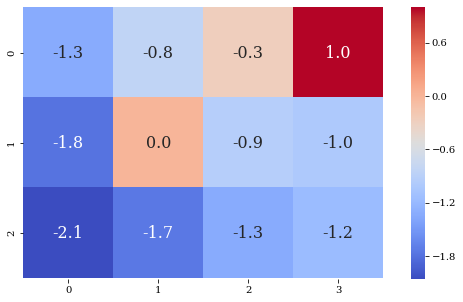

In [28]:
# Plot of the grid with values of each state
plot_state_value_grid(state_value_grid.reshape((3,4)))

## On-policy Monte Carlo (Exploring Starts)

Exploring starts is for action-value iteration. So for each state we estimate the value of taking action a. 

In [ ]:
# init environment with exploring starts 
max_episodes = 5000
env = Gridworld(step_cost=-0.1,max_ep_length=30, es=True)
action_value_grid = np.zeros((12,4))
action_value_grid[3] = 1 # Goal 
action_value_grid[7] = -1 # Death

# creating Returns list, where each state has four possible actions to take
possible_states = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11"]
possible_actions = ["0", "1", "2", "3"]
Returns = {}
for state in possible_states:
    for action in possible_actions:
        Returns[state+", "+action] = []
        
g = 0.99 # discounting factor

![on-policy exploring starts](images/MC_ES.png)

In [7]:
for ep in range(max_episodes):
    G = 0
    state = env.reset()
    trajectory = []
    while True:
        action = np.random.randint(4) #random policy
        next_state, reward, done = env.step(action)
        trajectory.append((state, action, reward))
        
        state = next_state
        if done:
            break

    for idx, step in enumerate(trajectory[::-1]):
        G = g*G + step[2]
        # first visit check
        if step[0] not in np.array(trajectory[::-1])[:,0][idx+1:]:
            Returns[str(step[0])+", "+str(step[1])].append(G)
            action_value_grid[step[0]][step[1]] = np.mean(Returns[str(step[0])+", "+str(step[1])])


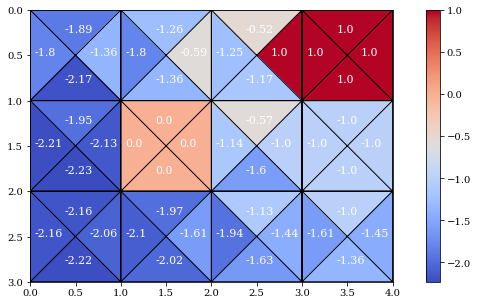

In [8]:
# plot of the grid with its action values. each field in the grid is split in four triangles,
# whereas the top triangle represents taking action 0 (up), right triangle represents action right (1), ...
# the numbers represent the estimated value taking the corresponding action
plot_action_value(action_value_grid)

## Monte Carlo Control without Exploring Starts

In [ ]:
max_episodes = 4000
env = Gridworld(step_cost=-0.1,max_ep_length=30, es=False)
action_value_grid = np.zeros((12,4))
action_value_grid[3] = 1 # Goal
action_value_grid[7] = -1 # Death

# creating Returns list, where each state has four possible actions to take
possible_states = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11"]
possible_actions = ["0", "1", "2", "3"]
Returns = {}
for state in possible_states:
    for action in possible_actions:
        Returns[state+", "+action] = []
        
g = 0.99 # discount factor

![MC_Control](images/on_pol_MC_control.png)

In [18]:
for ep in range(max_episodes):
    G = 0
    
    state = env.reset()
    trajectory = []
    while True:
        action_values = action_value_grid[state]
        probs = action_probs(action_values)
        action = np.random.choice(np.arange(4),p=probs) 

        next_state, reward, done = env.step(action)
        trajectory.append((state, action, reward))
        
        state = next_state
        if done:
            break

    for idx, step in enumerate(trajectory[::-1]):
        G = g*G + step[2]
        # first visit check
        if step[0] not in np.array(trajectory[::-1])[:,0][idx+1:]:
            Returns[str(step[0])+", "+str(step[1])].append(G)
            action_value_grid[step[0]][step[1]] = np.mean(Returns[str(step[0])+", "+str(step[1])])

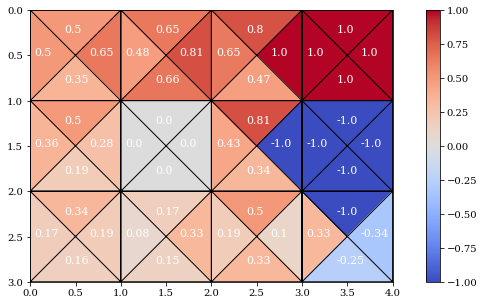

In [19]:
# plot of the grid with its action values. each field in the grid is split in four triangles,
# whereas the top triangle represents taking action 0 (up), right triangle represents action right (1), ...
# the numbers represent the estimated value taking the corresponding action
plot_action_value(action_value_grid)

# Off-policy MC prediction

In [82]:
max_episodes = 12000
env = Gridworld(step_cost=-0.1,max_ep_length=30, es=False)
action_value_grid[3] = 1 # Goal
action_value_grid[7] = -1 # Death

![off_MC_pred](images/off_mc_pred.png)

In [83]:
action_value_grid = np.zeros((12,4))
C = np.zeros((12,4))
b = lambda: np.random.randint(4) # behavior policy - random policy
t = lambda q,p: np.random.choice(q,p=p) # target policy - in this case i used the soft-epsilon policy of the on-policy MC

In [89]:
for ep in range(max_episodes):
    G = 0
    W = 1
    state = env.reset()
    trajectory = []
    while True:

        action = b()
        next_state, reward, done = env.step(action)
        trajectory.append((state, action, reward))
        
        state = next_state
        if done:
            break

    for idx, step in enumerate(trajectory[::-1]):
        G = g*G + step[2]
         
        # first visit check
        if step[0] not in np.array(trajectory[::-1])[:,0][idx+1:]:
            C[step[0]][step[1]] += W
            action_value_grid[step[0]][step[1]] += (W/C[step[0]][step[1]]) * (G-action_value_grid[step[0]][step[1]])
            
            # using the target policy to calculate the action probability
            action_values = action_value_grid[step[0]]
            probs = action_probs(action_values)
            action_idx = list(action_values).index(t(action_values, probs))
            
        
            W = W*(probs[action]/0.25)
        if W == 0:
            break

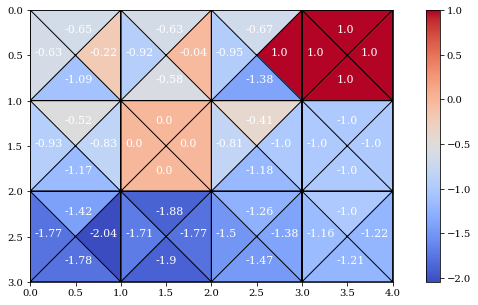

In [90]:
plot_action_value(action_value_grid)

# Off-policy Monte Carlo Control

In [91]:
max_episodes = 12000
env = Gridworld(step_cost=-0.1,max_ep_length=30, es=False)
action_value_grid[3] = 1 # Goal
action_value_grid[7] = -1 # Death

![off_mc_control](images/off_mc_control.png)

In [92]:
action_value_grid = np.zeros((12,4))
C = np.zeros((12,4))
b = lambda: np.random.randint(4) # behavior policy -random policy
t = lambda q: np.argmax(q) # target policy - argmax policy

In [93]:
for ep in range(max_episodes):
    G = 0
    W = 1
    state = env.reset()
    trajectory = []
    while True:

        action = b()
        next_state, reward, done = env.step(action)
        trajectory.append((state, action, reward))
        
        state = next_state
        if done:
            break

    for idx, step in enumerate(trajectory[::-1]):
        G = g*G + step[2]
         
        # first visit check
        if step[0] not in np.array(trajectory[::-1])[:,0][idx+1:]:
            C[step[0]][step[1]] += W
            action_value_grid[step[0]][step[1]] += (W/C[step[0]][step[1]]) * (G-action_value_grid[step[0]][step[1]])
            action = t(action_value_grid[step[0]])
            if action != step[1]:
                break
            W = W*(1/0.25)


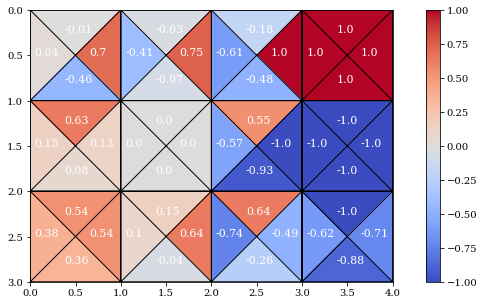

In [94]:
plot_action_value(action_value_grid)